## Fast Non-dominated Sort for Multiobjective Optimization
### Adapted from the paper `A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II`, by Kalyanmoy Deb, Amrit Pratap, Sameer Agarwal, and T. Meyarivan

DOI: *10.1109/4235.996017*

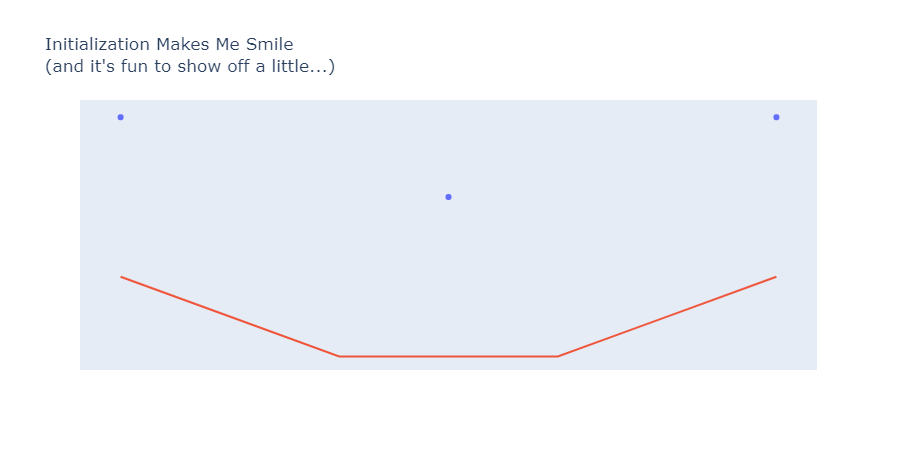

In [1]:
import numpy as np

import chart_studio.plotly as ply
import chart_studio.tools as plytool
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as plyoff

# plotly initialization
# if using jupyter lab, must have the plotly extension installed: https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/plotly-extension
# jupyter labextension install @jupyterlab/plotly-extension
plyoff.init_notebook_mode(connected=True)
x1 = [1,4,7]; y1 = [7,5,7]
x2 = [1,2,3,4,5,6,7]; y2 = [3,2,1,1,1,2,3]
plyoff.iplot(go.Figure(data=[go.Scatter({"x":x1, "y":y1, 'mode':'markers'}),
                             go.Scatter({"x":x2, "y":y2, 'mode':'lines'})],
                                        layout=go.Layout(autosize=False,width=500,title="Initialization Makes Me Smile<br>(and it's fun to show off a little...)",
                                                         showlegend=False, xaxis={'showgrid':False, 'showticklabels':False},
                                                         yaxis={'showgrid':False, 'showticklabels':False})))

# plotly authentication - not needed for offline mode
#plytool.set_credentials_file(username='ahowe42', api_key='PEbf792steMBTCn3TcSR')

In [2]:
def dominates(i,j):
    ''' i dom j if
    i >= j for all dimensions and
    i > j for at least 1 dimension '''
    M = i.shape[0]
    return (np.sum(i>=j)==M) & (np.sum(i>j)>=1)

In [3]:
def FastNonDomSort(objs):
    ''' implements a fast non-dominated sort algorithm for multi-objective maximization'''
    N,M = objs.shape
    parFronts = [[]]  # pareto fronts
    parRnks = [np.inf]*N                  # pareto front membership
    domSets = {i:[] for i in range(N)}    # set of items dominated
    domCnts = [0]*N                       # number dominating items
    f = 0                                 # pareto front counter
    
    # create the dominance sets & counts for all items & create the first dominance set
    for i,xi in enumerate(objs):
        for j,xj in enumerate(objs):
            # no need to test dominance of i wrt i
            if i == j:
                continue
            if dominates(xi,xj):
                # if i dominates j, add j to i's dominance list...
                domSets[i].append(j)
            elif dominates(xj,xi):
                # ... otherwise increase i's dominance counter
                domCnts[i] += 1
        # i is not dominated, so put in this pareto front
        if domCnts[i] == 0:
            parRnks[i] = f
            parFronts[f].append(i)
    keepDomCounts = domCnts.copy() # let's remember the non-discounted dominance counts
    
    # now create all additional pareto fronts
    while parFronts[f] != []:
        these = []
        # iterate over the items in the current pareto front
        for i in parFronts[f]:
            # now iterate over the item's dominance set
            for j in domSets[i]:
                # discount the dominance by item i ...
                domCnts[j] -= 1
                # ... and check if j is no longer dominated
                if domCnts[j] == 0:
                    parRnks[j] = f+1
                    these.append(j)
        # put these nondominated items in the next pareto front; if none then exit
        if these != []:
            f += 1
            parFronts.append(these)
        else:
            break
        
    return parFronts,parRnks,domSets,keepDomCounts

In [4]:
# create some random bi-objective data
N = 50
M = 2
np.random.seed(1211)
sols = np.random.rand(N,M)
sols = sols[sols[:,0].argsort()][::-1]
print(sols)

[[0.98772496 0.76637773]
 [0.93141789 0.9702976 ]
 [0.92852015 0.89347165]
 [0.90938365 0.99491186]
 [0.89041519 0.02023819]
 [0.86731537 0.85928532]
 [0.8454234  0.90821434]
 [0.84487304 0.57566001]
 [0.83458785 0.34028632]
 [0.83100785 0.43503704]
 [0.82953076 0.75236556]
 [0.81278281 0.87230449]
 [0.81254976 0.63329074]
 [0.80964233 0.54507774]
 [0.77586745 0.51285867]
 [0.76849623 0.65563649]
 [0.76408694 0.35403081]
 [0.70810663 0.27608576]
 [0.70743273 0.52060427]
 [0.69595655 0.18219911]
 [0.69406538 0.81260293]
 [0.67199075 0.68481652]
 [0.61219045 0.871679  ]
 [0.61129826 0.56320003]
 [0.58167492 0.61565357]
 [0.55920291 0.69453789]
 [0.54757767 0.76198679]
 [0.53634803 0.34291543]
 [0.53254832 0.97249147]
 [0.4927027  0.24440731]
 [0.48185628 0.03839081]
 [0.46944187 0.5729996 ]
 [0.46780566 0.0805379 ]
 [0.46407054 0.21717209]
 [0.46194603 0.37510874]
 [0.41423039 0.19169056]
 [0.40918196 0.20825787]
 [0.39642833 0.93681204]
 [0.38033256 0.26348672]
 [0.34889839 0.84962166]


In [5]:
# identify the pareto frontiers for each object
pfs,prs,ds,dc = FastNonDomSort(sols)
print(pfs)
print(prs)

[[0, 1, 3, 43], [2, 6, 28], [4, 5, 11, 37], [7, 10, 20, 22], [8, 9, 12, 15, 21, 25, 26, 39, 49], [13, 23, 24, 45], [14, 18, 31, 46, 48], [16, 34], [17, 27, 47], [19, 29, 38, 44], [30, 32, 33], [35, 36, 41], [40], [42]]
[0, 0, 1, 0, 2, 2, 1, 3, 4, 4, 3, 2, 4, 5, 6, 4, 7, 8, 6, 9, 3, 4, 3, 5, 5, 4, 4, 8, 1, 9, 10, 6, 10, 10, 7, 11, 11, 2, 9, 4, 12, 11, 13, 0, 9, 5, 6, 8, 6, 4]


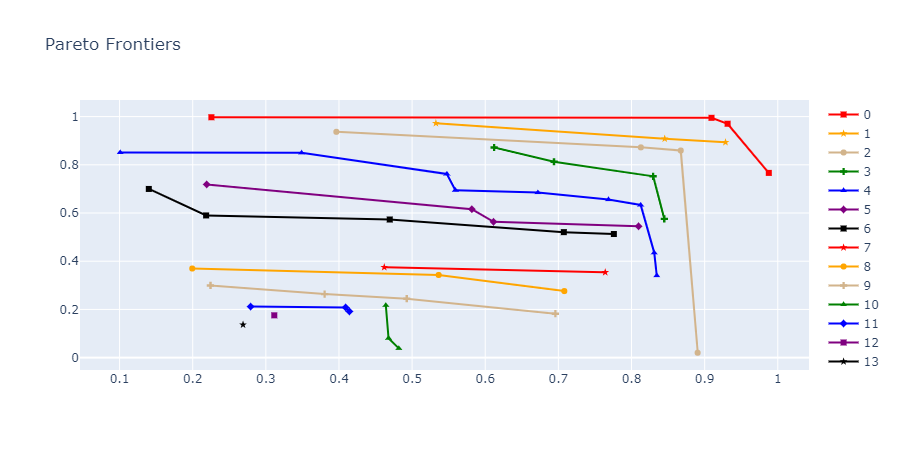

In [6]:
# plot the different pareto frontiers
colrs = ('red', 'orange', 'tan', 'green', 'blue', 'purple', 'black')
symbs = ('square', 'star', 'circle', 'cross', 'triangle-up', 'diamond')

trc = [None]*len(pfs)
c = 0; s = 0
for i,front in enumerate(pfs):
    these = sols[front]
    col = colrs[c]; sym = symbs[s]
    trc[i] = go.Scatter({'x':these[:,0], 'y':these[:,1], 'mode':'lines+markers', 'name':i,
                          'line':{'color':col}, 'marker':{'symbol':sym, 'color':col}})
    # increment the color & symbol counters, modulo the enumeration lengths
    c = (c+1)%len(colrs); s = (s+1)%len(symbs)

plyoff.iplot(go.Figure(data=trc, layout=go.Layout(title='Pareto Frontiers')))